In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

from matplotlib import pyplot as plt

In [2]:
DATA_DIR = 'preprocessed_data'
IMAGE_SIZE = (240, 180)

In [3]:
train_data, test_data = keras.preprocessing.image_dataset_from_directory(DATA_DIR, image_size=IMAGE_SIZE, validation_split=0.2, subset='both', seed=228, batch_size=32)
nonbatched_data = keras.preprocessing.image_dataset_from_directory(DATA_DIR, image_size=IMAGE_SIZE, seed=228, batch_size=None)

Found 22169 files belonging to 41 classes.
Using 17736 files for training.
Using 4433 files for validation.
Found 22169 files belonging to 41 classes.


In [53]:
class_names = nonbatched_data.class_names

In [64]:
def visualize_classes(data):

    class_counts = count_classes(data)

    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Number of samples')
    plt.xticks(rotation=45)
    plt.show()

def visualize_classes_v2(data):

    class_counts = count_classes_v2(data)

    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Number of samples')
    plt.xticks(rotation=45)
    plt.show()

def visualize_sample_images(data):
    plt.figure(figsize=(24, 12))
    for images, labels in data.take(1): 
        for i in range(32):
            plt.subplot(4, 8, i + 1)
            plt.imshow(np.array(images[i]).astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

def count_classes(data):
    class_counts = {class_name: 0 for class_name in class_names}
    for images, labels in data:
        for label in labels:
            class_name = class_names[label]
            class_counts[class_name] += 1

    return class_counts

def count_classes_v2(data):
    class_counts = {class_name: 0 for class_name in class_names}
    for image, label in data:
        class_name = class_names[label]
        class_counts[class_name] += 1

    return class_counts

def count_classes_in_predicted_labels(y_pred):
    class_counts = {class_name: 0 for class_name in class_names}
    for label in y_pred:
        class_name = class_names[label]
        class_counts[class_name] += 1

    return class_counts

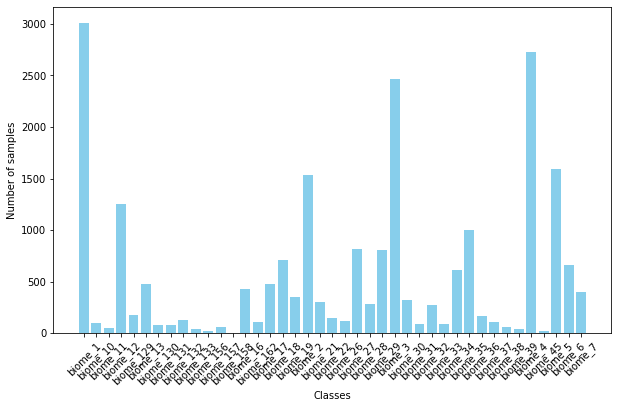

In [126]:
visualize_classes_v2(nonbatched_data)

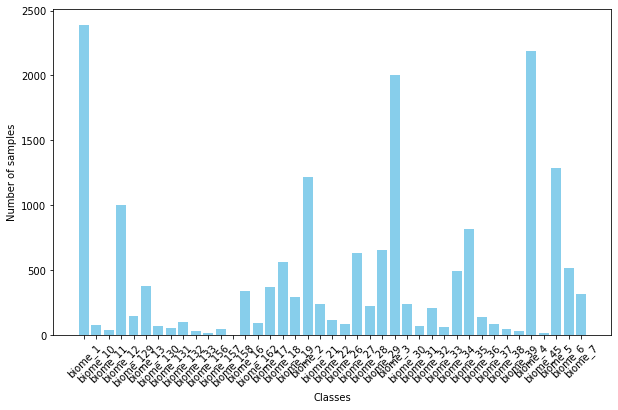

In [120]:
visualize_classes(train_data)

In [123]:
class_count = count_classes_v2(nonbatched_data)
print(class_count)

{'biome_1': 3012, 'biome_10': 102, 'biome_11': 48, 'biome_12': 1254, 'biome_129': 174, 'biome_13': 474, 'biome_130': 84, 'biome_131': 78, 'biome_132': 126, 'biome_133': 36, 'biome_156': 24, 'biome_157': 60, 'biome_158': 6, 'biome_16': 426, 'biome_162': 108, 'biome_17': 474, 'biome_18': 708, 'biome_19': 354, 'biome_2': 1530, 'biome_21': 300, 'biome_22': 144, 'biome_26': 114, 'biome_27': 816, 'biome_28': 282, 'biome_29': 810, 'biome_3': 2466, 'biome_30': 324, 'biome_31': 90, 'biome_32': 270, 'biome_33': 90, 'biome_34': 612, 'biome_35': 1002, 'biome_36': 162, 'biome_37': 108, 'biome_38': 60, 'biome_39': 42, 'biome_4': 2724, 'biome_45': 18, 'biome_5': 1596, 'biome_6': 665, 'biome_7': 396}


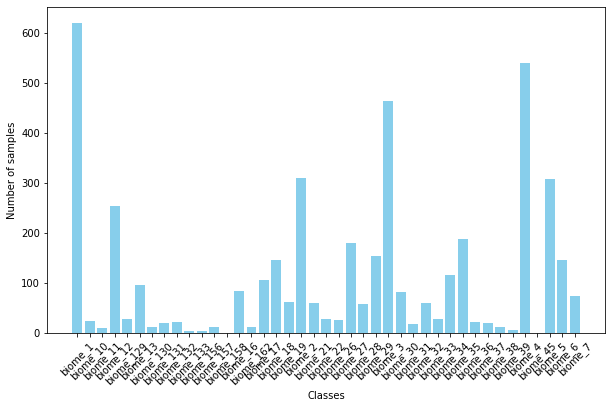

In [52]:
visualize_classes(test_data)

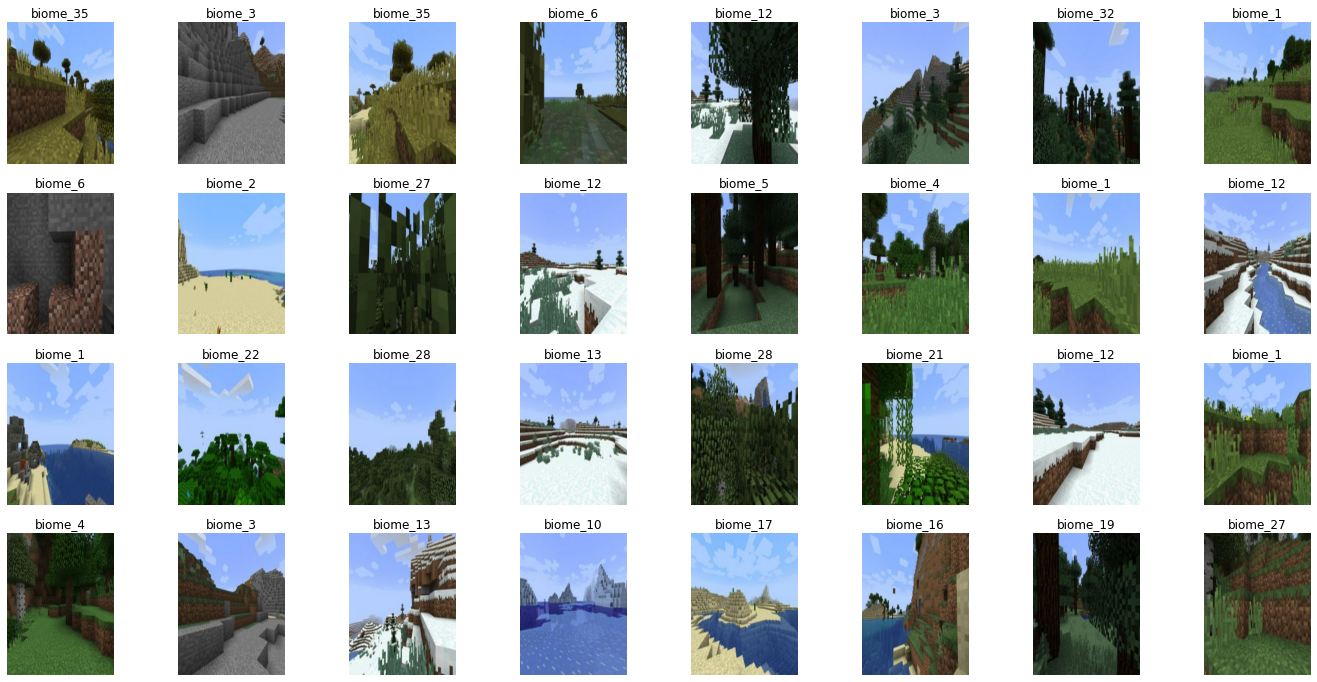

In [68]:
visualize_sample_images(train_data)

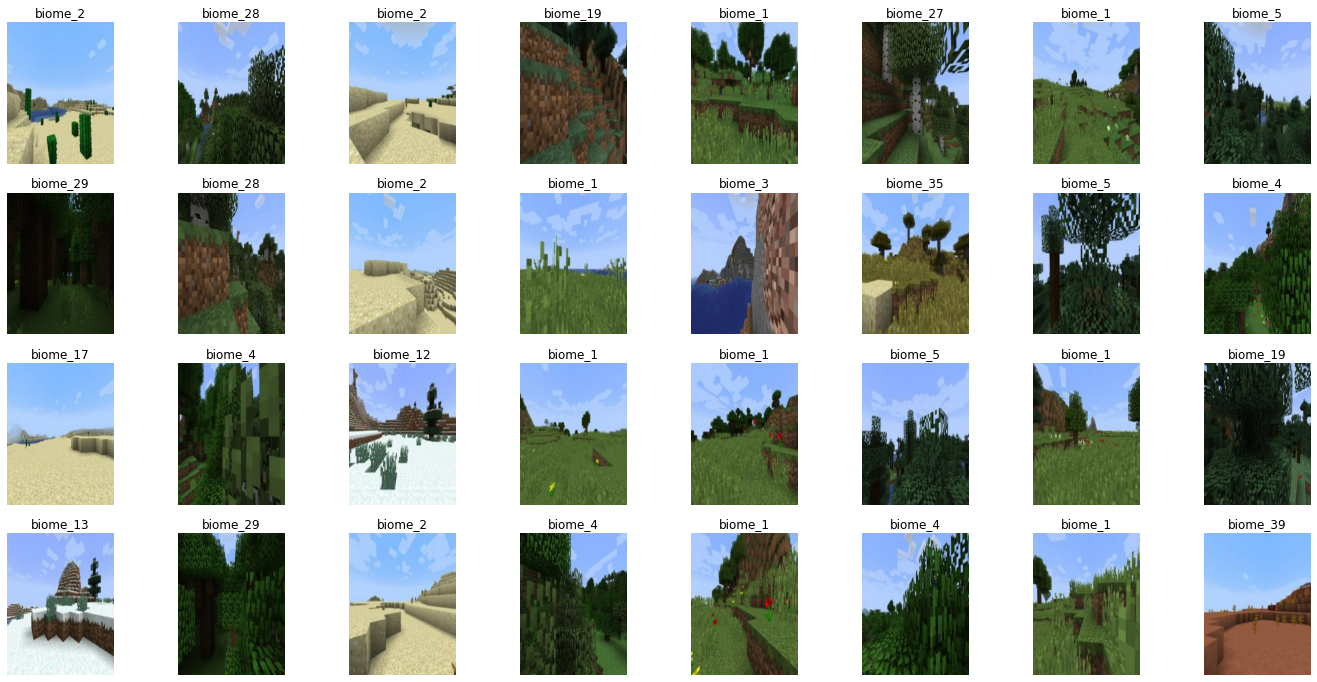

In [69]:
visualize_sample_images(test_data)

In [99]:
target_classes = ['biome_2']
target_class_indices = [class_names.index(cls) for cls in target_classes]

def filter_classes(image, label):
    is_in_class = tf.reduce_any(tf.equal(label, target_class_indices))
    return is_in_class

In [10]:
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [14]:
normalized_train = train_data.map(normalize_img)
normalized_test = test_data.map(normalize_img)

In [15]:
def get_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(240, 180, 3)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(32, activation='sigmoid'))
    model.add(keras.layers.Dense(41, activation='softmax'))
    return model

In [16]:
def get_model_v2():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(240, 180, 3)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(41, activation='softmax'))
    return model

In [17]:
model = get_model()
model2 = get_model_v2()

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 238, 178, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 119, 89, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 117, 87, 32)       18464     
                                                                 
 flatten_2 (Flatten)         (None, 325728)            0         
                                                                 
 dense_4 (Dense)             (None, 32)                10423328  
                                                                 
 dense_5 (Dense)             (None, 41)                1353      
                                                      

In [19]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 238, 178, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 119, 89, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 118, 88, 32)       8224      
                                                                 
 flatten_3 (Flatten)         (None, 332288)            0         
                                                                 
 dense_6 (Dense)             (None, 32)                10633248  
                                                                 
 dense_7 (Dense)             (None, 41)                1353      
                                                      

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit((normalized_train), epochs=10, validation_data=(normalized_test))

Epoch 1/10
555/555 [==============================] - 1101s 2s/step - loss: 2.5177 - accuracy: 0.3466 - val_loss: 1.9623 - val_accuracy: 0.4651
Epoch 2/10
555/555 [==============================] - 1181s 2s/step - loss: 1.7164 - accuracy: 0.5500 - val_loss: 1.5710 - val_accuracy: 0.5561
Epoch 3/10
555/555 [==============================] - 1130s 2s/step - loss: 1.4740 - accuracy: 0.5772 - val_loss: 1.3882 - val_accuracy: 0.5996
Epoch 4/10
555/555 [==============================] - 1235s 2s/step - loss: 1.3056 - accuracy: 0.6177 - val_loss: 1.2282 - val_accuracy: 0.6479
Epoch 5/10
555/555 [==============================] - 1097s 2s/step - loss: 1.1925 - accuracy: 0.6497 - val_loss: 1.1960 - val_accuracy: 0.6467
Epoch 6/10
555/555 [==============================] - 1086s 2s/step - loss: 1.1048 - accuracy: 0.6710 - val_loss: 1.1425 - val_accuracy: 0.6614
Epoch 7/10
555/555 [==============================] - 1135s 2s/step - loss: 1.0119 - accuracy: 0.6987 - val_loss: 1.0954 - val_accuracy:

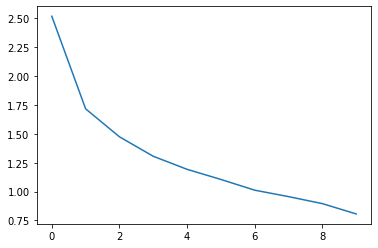

In [22]:
plt.plot(history.history['loss'])

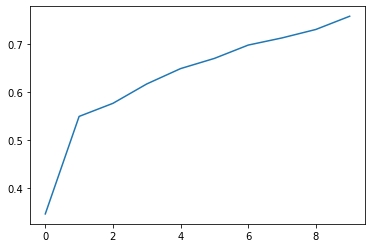

In [32]:
plt.plot(history.history['accuracy'])

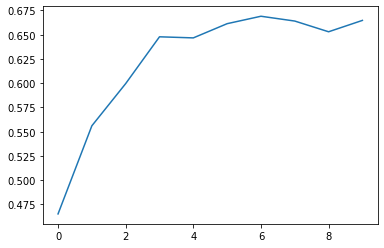

In [28]:
plt.plot(history.history['val_accuracy'])

In [23]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit((normalized_train), epochs=10, validation_data=(normalized_test))

Epoch 1/10
555/555 [==============================] - 1007s 2s/step - loss: 2.2015 - accuracy: 0.4208 - val_loss: 1.5565 - val_accuracy: 0.5700
Epoch 2/10
555/555 [==============================] - 911s 2s/step - loss: 1.3706 - accuracy: 0.6041 - val_loss: 1.3150 - val_accuracy: 0.6176
Epoch 3/10
555/555 [==============================] - 998s 2s/step - loss: 1.0667 - accuracy: 0.6847 - val_loss: 1.3796 - val_accuracy: 0.6061
Epoch 4/10
555/555 [==============================] - 854s 2s/step - loss: 0.7727 - accuracy: 0.7670 - val_loss: 1.6705 - val_accuracy: 0.5766
Epoch 5/10
555/555 [==============================] - 851s 2s/step - loss: 0.5153 - accuracy: 0.8469 - val_loss: 1.9023 - val_accuracy: 0.5707
Epoch 6/10
555/555 [==============================] - 848s 2s/step - loss: 0.3588 - accuracy: 0.8973 - val_loss: 2.2277 - val_accuracy: 0.5655
Epoch 7/10
555/555 [==============================] - 844s 2s/step - loss: 0.2625 - accuracy: 0.9261 - val_loss: 2.5188 - val_accuracy: 0.552

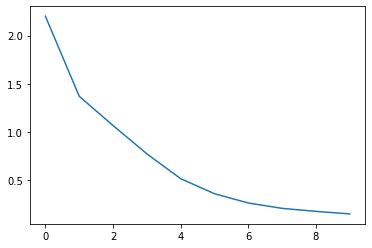

In [24]:
plt.plot(history2.history['loss'])

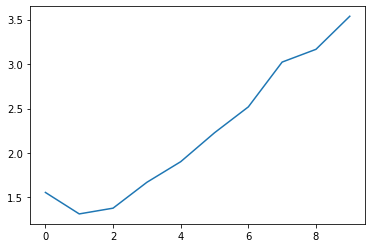

In [29]:
plt.plot(history2.history['val_loss'])

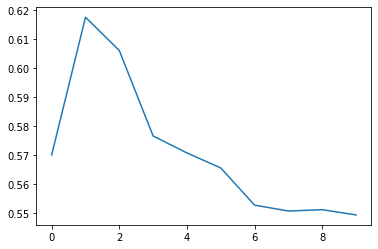

In [31]:
plt.plot(history2.history['val_accuracy'])

In [33]:
pred = model.predict(normalized_test)

139/139 [==============================] - 51s 363ms/step


In [44]:
predicted_labels = np.argmax(pred, axis=-1)

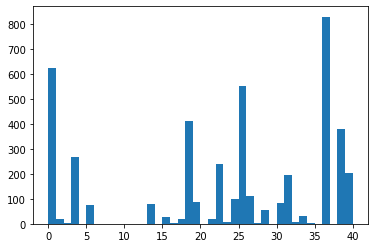

In [49]:
plt.hist(predicted_labels, bins=40)
plt.show()

In [57]:
pred2 = model2.predict(normalized_test)

139/139 [==============================] - 47s 334ms/step


In [58]:
predicted_labels2 = np.argmax(pred2, axis=-1)

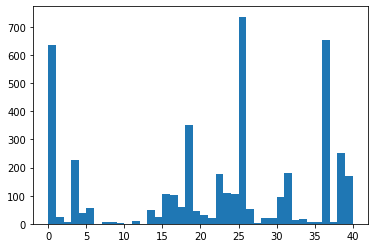

In [60]:
plt.hist(predicted_labels2, bins=40)
plt.show()

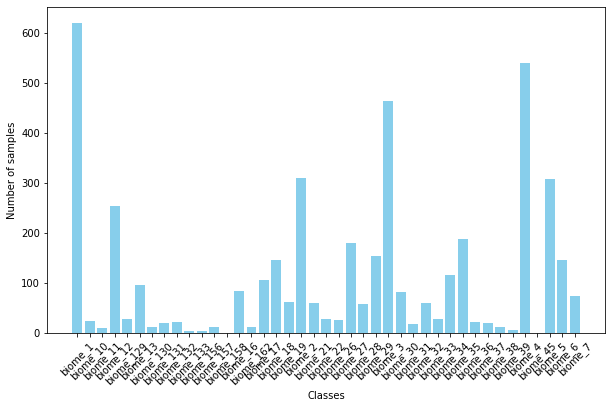

In [61]:
visualize_classes(test_data)

In [65]:
predicted_count = count_classes_in_predicted_labels(predicted_labels)

In [67]:
predicted_count2 = count_classes_in_predicted_labels(predicted_labels2)

In [69]:
predicted_count2

{'biome_1': 634,
 'biome_10': 24,
 'biome_11': 5,
 'biome_12': 226,
 'biome_129': 37,
 'biome_13': 56,
 'biome_130': 0,
 'biome_131': 6,
 'biome_132': 8,
 'biome_133': 3,
 'biome_156': 1,
 'biome_157': 10,
 'biome_158': 0,
 'biome_16': 49,
 'biome_162': 23,
 'biome_17': 107,
 'biome_18': 102,
 'biome_19': 59,
 'biome_2': 351,
 'biome_21': 44,
 'biome_22': 32,
 'biome_26': 22,
 'biome_27': 177,
 'biome_28': 110,
 'biome_29': 105,
 'biome_3': 736,
 'biome_30': 52,
 'biome_31': 4,
 'biome_32': 22,
 'biome_33': 20,
 'biome_34': 97,
 'biome_35': 181,
 'biome_36': 15,
 'biome_37': 18,
 'biome_38': 5,
 'biome_39': 8,
 'biome_4': 653,
 'biome_45': 8,
 'biome_5': 252,
 'biome_6': 105,
 'biome_7': 66}

In [75]:
min(predicted_count2.values())

0

In [56]:
model.save_weights('./models/model1/')

In [55]:
model2.save_weights('./models/model2/')